<a href="https://colab.research.google.com/github/AdamClarkStandke/GenerativeDeepLearning/blob/main/StableVideoDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U diffusers transformers accelerate

In [2]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video
import inspect
from IPython.display import HTML
from base64 import b64encode
import os
import re

In [3]:
def display(name):
  # display video
  comp = re.sub(".mp4", repl="_compressed.mp4", string=name)
  save_path="/content/" + name
  compressed_path = "/content/" + comp
  os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
  mp4 = open(compressed_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""<video width=1024 height=576 controls loop><source src="%s" type="video/mp4"></video>""" % data_url)

In [4]:
pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16")
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

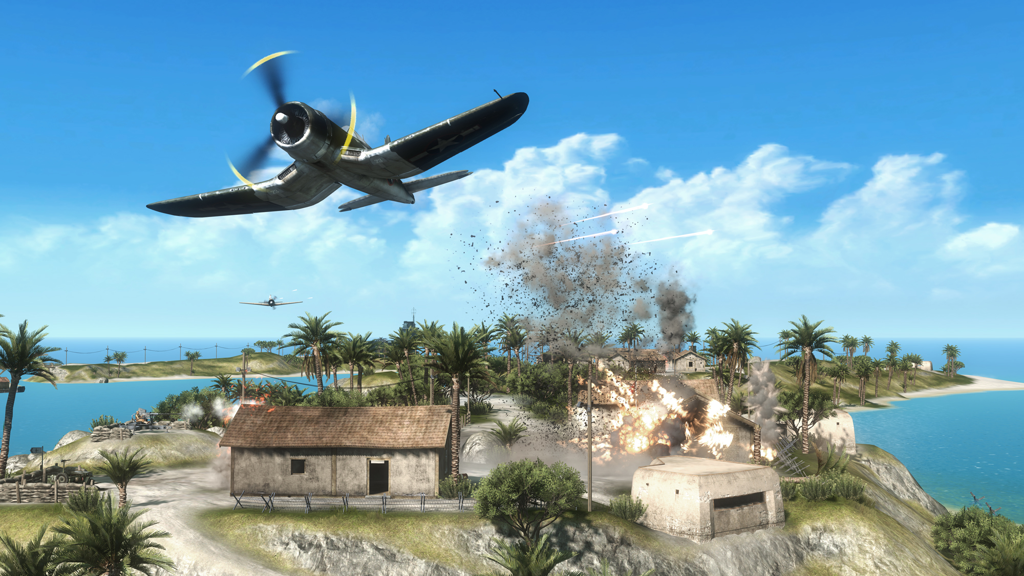

In [11]:
# load the conditioning image
image = load_image("https://cdn.mos.cms.futurecdn.net/nqaqx4jzpn3siKMFtqTmH5.jpg")
image = image.resize((1024, 576))
image

In [12]:
# turn image into 4 second video
motion = 130 # default is 127
augmentation = 0.02 # default is 0.02
pre_generated_lat = None
min_guide = 1.0 # default is 1.0
max_guide = 3.0 # default is 3.0
generator = torch.manual_seed(42)
frames = pipe(image, decode_chunk_size=8, generator=generator, motion_bucket_id=motion, min_guidance_scale=min_guide, max_guidance_scale=max_guide, noise_aug_strength=augmentation, latents=pre_generated_lat).frames[0]
export_to_video(frames, "me.mp4", fps=7)
display("me.mp4")

  0%|          | 0/25 [00:00<?, ?it/s]

In [16]:
export_to_video(frames, "battlefield_game.mp4", fps=7)

'battlefield_game.mp4'

In [17]:
display("battlefield_game.mp4")

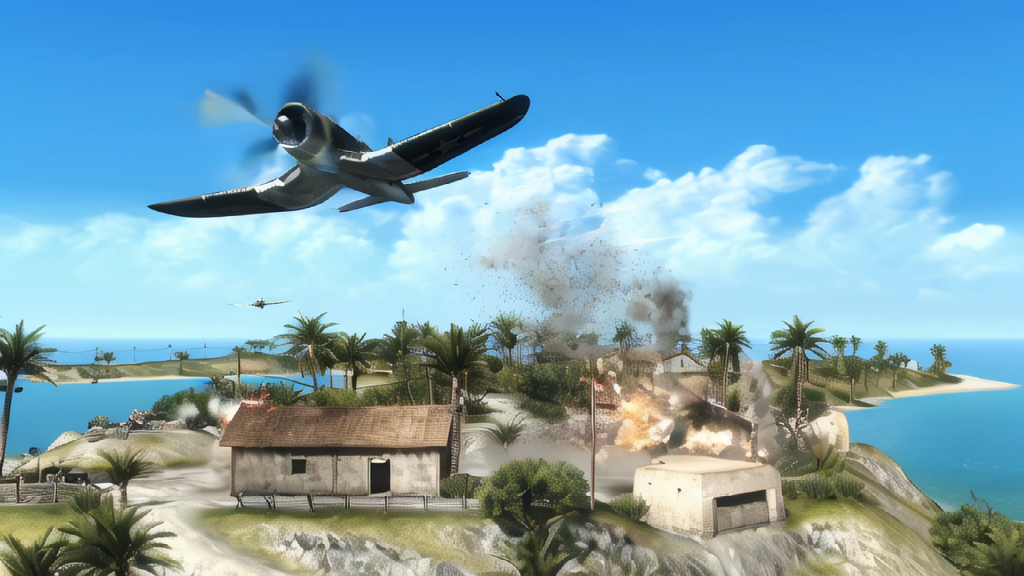

In [18]:
frames[0]

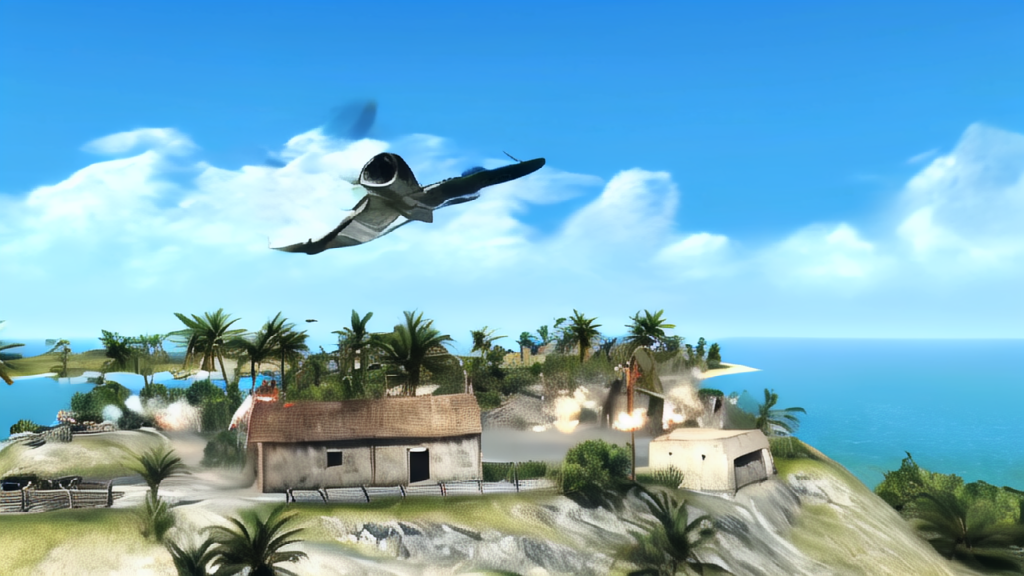

In [19]:
frames[-1]